In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


def err_operadd(a, b):
    return (a**2 + b**2) ** 0.5

In [2]:
exp = pd.read_excel('Data/neon_eta_negp_gauss3.xlsx', sheet_name='eta')
exp['weight'] = 1 / exp['eta_f−d_err'] ** 2
exp['weighted_phase'] = exp['weight'] * exp['eta_f−d']

grp = exp.groupby('photon (eV)')[['weight', 'weighted_phase']].sum()
grp['Kinetic energy (eV)'] = 2*grp.index - 24.58738880
grp['Diff phase (neg p wave model) (rad)'] = grp['weighted_phase'] / grp['weight']
grp['Std err (rad)'] = 1 / grp['weight'] ** 0.5
grp = grp.set_index('Kinetic energy (eV)')[[
    'Diff phase (neg p wave model) (rad)',
    'Std err (rad)',
]]
display(grp)

grpdff = pd.DataFrame({
    'Kinetic energy (eV)': (grp.index.values[1:] + grp.index.values[:-1]) / 2,
    'KE std err (eV)': np.diff(grp.index) / 2,
    'Diff time (as)': np.diff(grp['Diff phase (neg p wave model) (rad)']) / np.diff(grp.index) * 24.1888432651 / 0.0367493,
    'DT std err (as)': (err_operadd(grp['Std err (rad)'].values[1:], grp['Std err (rad)'].values[:-1])
                        / np.diff(grp.index) * 24.1888432651 / 0.0367493),
}).set_index('Kinetic energy (eV)')
display(grpdff)

,Diff phase (neg p wave model) (rad),Std err (rad)
Kinetic energy (eV),,
4.012611,1.667223,0.027393
7.212611,1.452253,0.043198
13.612611,1.402048,0.014170


,KE std err (eV),Diff time (as),DT std err (as)
Kinetic energy (eV),,,
5.612611,1.6,-44.217493,10.521446
10.412611,3.2,-5.163374,4.675657


In [3]:
the = pd.read_excel('Data/the_neon_elena.xlsx', sheet_name='20180915')
the['Kinetic energy (eV)'] = 2*the['w_photon (eV)'] - 24.58738880
the = the.rename(columns={
    'phase_res (rad)': 'Diff phase (res theory) (rad)',
    'phase_scatt (rad)': 'Diff phase (scatt theory) (rad)',
})
the = the.set_index('Kinetic energy (eV)')[[
    'Diff phase (res theory) (rad)',
    'Diff phase (scatt theory) (rad)',
]]
the['Diff time (res theory) (au)'] = np.gradient(the['Diff phase (res theory) (rad)'], the.index) * 24.1888432651 / 0.0367493
the['Diff time (scatt theory) (au)'] = np.gradient(the['Diff phase (scatt theory) (rad)'], the.index) * 24.1888432651 / 0.0367493
the = the[the.index<15]
the

,Diff phase (res theory) (rad),Diff phase (scatt theory) (rad),Diff time (res theory) (au),Diff time (scatt theory) (au)
Kinetic energy (eV),,,,
3.412611,1.946309,1.949366,-19.831173,-19.598451
3.812611,1.934258,1.937456,-20.091985,-19.857953
4.212611,1.921889,1.925231,-20.616874,-20.379134
4.612611,1.909200,1.912687,-21.121644,-20.877774
5.012611,1.896218,1.899855,-21.558030,-21.305353
5.412611,1.882998,1.886792,-21.806382,-21.622669
5.812611,1.869714,1.873575,-21.986147,-21.797732
6.212611,1.856276,1.860299,-22.103601,-21.804206
6.612611,1.842849,1.847074,-22.022515,-21.620226


In [4]:
fit = pd.read_excel('Data/the_neon_elena.xlsx', sheet_name='20180905')
fit['Kinetic energy (eV)'] = 2*fit['w_photon (eV)'] - 24.58738880
fit = fit.rename(columns={
    'phase_m3 (rad)': 'Diff phase (M3 model) (rad)',
    'phase_res (rad)': 'Diff phase (res theory) (rad)',
    'phase_scatt (rad)': 'Diff phase (scatt theory) (rad)',
})
fit = fit.set_index('Kinetic energy (eV)')[[
    'Diff phase (M3 model) (rad)',
    'Diff phase (res theory) (rad)',
    'Diff phase (scatt theory) (rad)',
]]
display(fit)

fitdff = pd.DataFrame({
    'Kinetic energy (eV)': (fit.index.values[1:] + fit.index.values[:-1]) / 2,
    'KE std err (eV)': np.diff(fit.index) / 2,
    'Diff time (as)': np.diff(fit['Diff phase (M3 model) (rad)']) / np.diff(fit.index) * 24.1888432651 / 0.0367493,
}).set_index('Kinetic energy (eV)')
display(fitdff)

,Diff phase (M3 model) (rad),Diff phase (res theory) (rad),Diff phase (scatt theory) (rad)
Kinetic energy (eV),,,
4.012611,1.884955,2.199114,2.199114
7.212611,1.539380,2.073451,2.073451
13.612611,1.413716,1.721000,1.884955


,KE std err (eV),Diff time (as)
Kinetic energy (eV),,
5.612611,1.6,-71.081817
10.412611,3.2,-12.923967


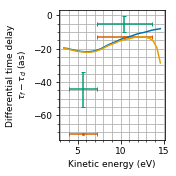

In [5]:
plt.style.use('Science.mplstyle')
plt.figure(figsize=(2.25, 2.25))
plt.xlabel('Kinetic energy (eV)')
plt.ylabel('Differential time delay\n' r'${\tau_f} - {\tau_d}$ (as)')

plt.plot(the['Diff time (scatt theory) (au)'])
plt.plot(the['Diff time (res theory) (au)'])
plt.errorbar(grpdff.index, grpdff['Diff time (as)'],
             xerr=grpdff['KE std err (eV)'], yerr=grpdff['DT std err (as)'],
             fmt=',')
plt.errorbar(fitdff.index, fitdff['Diff time (as)'],
             xerr=fitdff['KE std err (eV)'],
             fmt='o')

plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 2, 5, 10])
plt.grid(True, which='both')

# plt.figlegend(loc='center right', shadow=True)
plt.tight_layout(pad=0)
pos = plt.gca().get_position()
plt.savefig("Figures/fig_compare_dt_with_elena's.pdf")
plt.show()

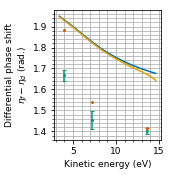

In [6]:
plt.style.use('Science.mplstyle')
plt.figure(figsize=(2.25, 2.25))
plt.xlabel('Kinetic energy (eV)')
plt.ylabel('Differential phase shift\n' r'${\eta_f} - {\eta_d}$ (rad.)')

plt.plot(the['Diff phase (scatt theory) (rad)'])
plt.plot(the['Diff phase (res theory) (rad)'])
plt.errorbar(grp.index, grp['Diff phase (neg p wave model) (rad)'],
             yerr=grp['Std err (rad)'],
             fmt='o')
plt.plot(fit['Diff phase (M3 model) (rad)'], 'o')

plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 2, 5, 10])
plt.grid(True, which='both')

# plt.figlegend(loc='upper right', shadow=True)
plt.tight_layout(pad=0)
plt.gca().set_position(pos)
plt.savefig("Figures/fig_compare_dphase_with_elena's.pdf")
plt.show()

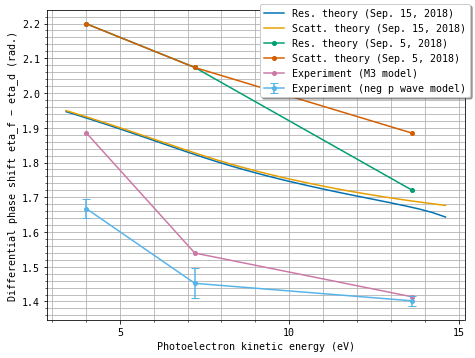

In [7]:
plt.style.use('Report.mplstyle')
plt.figure()
plt.xlabel('Photoelectron kinetic energy (eV)')
plt.ylabel('Differential phase shift eta_f − eta_d (rad.)')

plt.plot(the['Diff phase (res theory) (rad)'], label='Res. theory (Sep. 15, 2018)')
plt.plot(the['Diff phase (scatt theory) (rad)'], label='Scatt. theory (Sep. 15, 2018)')
plt.plot(fit['Diff phase (res theory) (rad)'], '-o', label='Res. theory (Sep. 5, 2018)')
plt.plot(fit['Diff phase (scatt theory) (rad)'], '-o', label='Scatt. theory (Sep. 5, 2018)')
plt.plot(fit['Diff phase (M3 model) (rad)'], '-o', label='Experiment (M3 model)')
plt.errorbar(grp.index, grp['Diff phase (neg p wave model) (rad)'],
             yerr=grp['Std err (rad)'],
             fmt='-o',
             label='Experiment (neg p wave model)')

plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 5, 10])
plt.grid(True, which='both')

# plt.legend()
plt.figlegend(loc='upper right', shadow=True)
plt.tight_layout(pad=0)
plt.savefig("Figures/fig_compare_dt_with_elena's (report).pdf")
plt.show()